----
# 演習課題その3 リンク解析

## 必須課題（１）PageRankアルゴリズムの確認

講義資料「リンク解析（１）」p12のグラフに対して，遷移確率行列が確率行列の性質を満たすよう修正し，
べき乗法に基づくPageRankの計算を適用し，結果を報告せよ．ただし，$d = 0.85$とする．また，さまざまな初期状態分布に対してPageRank値を求めることで，異なる初期状態分布に対して同じPageRank値が得られることを確認せよ．

In [98]:
import numpy as np
import numpy.linalg as lg
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
%precision 2

'%.2f'

べき乗法に基づく，pagerankの計算を以下のように定義する．

In [99]:
def pagerank(A, d = 0.85, eps = 1e-6, p=np.ones(A.shape[0])/A.shape[0]):
    """
      A: 遷移確率行列
      d: damping factor
      eps: 誤差（eps以下になれば終了）
    """
    n = A.shape[0]  #ページ数n
    e = np.ones(A.shape[0]) #要素が1のn次元ベクトル
    #p = e  / n #PageRankベクトルの初期化（初期状態分布）
    print("P: ", p)
    count = 1
    while True: # while Trueとしているが，実際には一定回数以上ループを繰り返すとアルゴリズムを終了するような設計がよい
        if count >= 1000:
            print("Not converged")
            break
        p_next = d * np.dot(A.T, p) + (1.0 - d) * e/n # PageRankベクトルの更新
        if lg.norm(p_next - p, ord=1) <= eps: #差のL1ノルムがeps以下になれば，終了
            p = p_next
            break
        p = p_next
        count += 1
    return p

/Users/kataoka/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/kataoka/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/Users/kataoka/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/kataoka/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/rcsetup.p

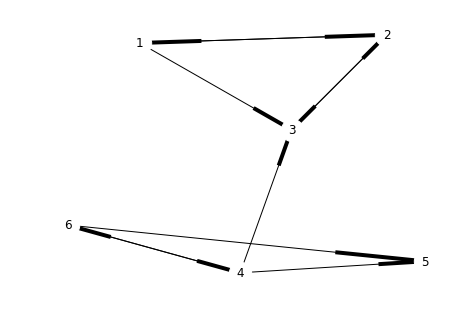

In [100]:
# 有向グラフの描画
G = nx.DiGraph()
G.add_nodes_from([1,2,3,4,5,6])
G.add_edges_from([(1,2),(1,3),(2,1),(2,3),(3,2),(4,3),(4,5),(4,6),(6,4),(6,5)])
pos = nx.spring_layout(G) # ばねモデルに基づくグラフのレイアウト
nx.draw(G, pos, with_labels=True, node_size=500, node_color="w")
plt.show()

講義資料p.12のグラフは，上記のように定義される．<br>
上記のグラフに対して，初期状態分布を以下のように定義する．

In [101]:
A = np.array([
    [0, 1/2, 1/2, 0, 0, 0],
    [1/2, 0, 1/2, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 0, 1/3, 0, 0, 0],
    [1/6, 1/6, 1/6, 1/6, 1/6, 1/6],
    [0, 0, 0, 1/2, 1/2, 0]
])
A

array([[ 0.  ,  0.5 ,  0.5 ,  0.  ,  0.  ,  0.  ],
       [ 0.5 ,  0.  ,  0.5 ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.33,  0.  ,  0.  ,  0.  ],
       [ 0.17,  0.17,  0.17,  0.17,  0.17,  0.17],
       [ 0.  ,  0.  ,  0.  ,  0.5 ,  0.5 ,  0.  ]])

ノード5から他のノードへエッジは張られていないが，全てのページへリンクを張ることで，遷移確率行列を修正する．<br>
この修正された遷移確率行列に対し，様々な初期状態分布の場合に対しPageRank値を計算する．

In [15]:
p = pagerank(A, d = 0.85, eps=1e-6)
p

P:  [ 0.17  0.17  0.17  0.17  0.17  0.17]


array([ 0.16,  0.31,  0.24,  0.04,  0.04,  0.03])

In [16]:
a = np.arange(A.shape[0]) + np.ones(A.shape[0])
p = pagerank(A, d = 0.85, eps=1e-6, p=a/np.sum(a))
p

P:  [ 0.05  0.1   0.14  0.19  0.24  0.29]


array([ 0.16,  0.31,  0.24,  0.04,  0.04,  0.03])

In [102]:
p = pagerank(A, d = 0.85, eps=1e-6)
p

P:  [ 0.17  0.17  0.17  0.17  0.17  0.17]


array([ 0.16,  0.31,  0.24,  0.04,  0.04,  0.03])

確かに，異なる初期状態分布に対して，同じPageRank値が得られることが確認できた．

## 必須課題（２）定常分布

講義で述べたように，マルコフ連鎖が一意の定常分布 ${\mathbf \pi}$ を持つためには，そのマルコフ連鎖は既約かつ非周期的である必要がある．そこで，「既約ではあるが非周期的でないマルコフ連鎖」であるようなウェブグラフ$G$を用意し，$G$に対してテレポーテーションを用いない単純なPageRankアルゴリズム（すなわち，${\mathbf p} = A^{T}{\mathbf p}$）に基づくべき乗法を適用することで，初期状態分布によってはPageRankベクトルが収束しない場合があることを確認せよ．

- 用意したウェブグラフ$G$をNetworkXで可視化すること
- 用意したウェブグラフ$G$は，講義で使用した例とは異なる例を用いること

既約かつ非周期的でない有向グラフの例として以下のグラフを考える．
下のグラフ_G_は一定時間経過後全てのノードに達することができるため，既約であるが，
全てのパスの長さが3の倍数になるため，非周期的ではない．

/Users/kataoka/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/kataoka/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/Users/kataoka/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/kataoka/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/rcsetup.p

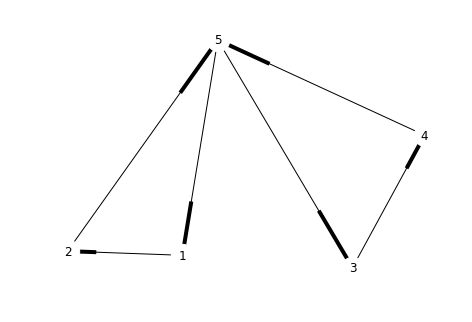

In [94]:
# 既約かつ非周期的でない有向グラフの描画
G = nx.DiGraph()
#G.add_nodes_from([1,2,3,4])
#G.add_edges_from([(1,4),(2,4),(3,4),(4,1),(4,2),(4,3)])
G.add_nodes_from([1,2,3,4,5])
G.add_edges_from([(1,2),(2,5),(3,4),(4,5),(5,1),(5,3)])
pos = nx.spring_layout(G) # ばねモデルに基づくグラフのレイアウト
nx.draw(G, pos, with_labels=True, node_size=500, node_color="w")
plt.show()

In [95]:
# 遷移確率行列
B = np.array([
    [0, 1, 0, 0, 0],
    [0, 0, 0, 0, 1],
    [0, 0, 0, 1, 0],
    [0, 0, 0, 0, 1],
    [1/2, 0, 1/2, 0, 0]
])
B

array([[ 0. ,  1. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  1. ],
       [ 0. ,  0. ,  0. ,  1. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  1. ],
       [ 0.5,  0. ,  0.5,  0. ,  0. ]])

In [96]:
p = np.asarray([1/5, 1/5, 1/5, 1/5, 1/5])
pagerank(B, d=1, eps=1e-6, p=p)

P:  [ 0.2  0.2  0.2  0.2  0.2]
Not converged


array([ 0.2,  0.2,  0.2,  0.2,  0.2])

In [97]:
p = np.asarray([1/4, 1/4, 1/4, 1/4, 0])
pagerank(B, d=1, eps=1e-6, p=p)

P:  [ 0.25  0.25  0.25  0.25  0.  ]
Not converged


array([ 0.25,  0.25,  0.25,  0.25,  0.  ])

上記のような初期状態分布では，収束しないことが確かめられた．

/Users/kataoka/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/kataoka/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/Users/kataoka/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/kataoka/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/rcsetup.p

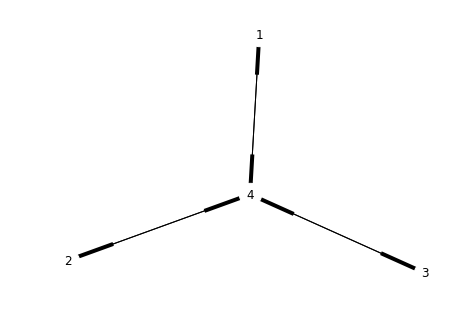

In [87]:
G = nx.DiGraph()
G.add_nodes_from([1,2,3,4])
G.add_edges_from([(1,4),(2,4),(3,4),(4,1),(4,2),(4,3)])
pos = nx.spring_layout(G) # ばねモデルに基づくグラフのレイアウト
nx.draw(G, pos, with_labels=True, node_size=500, node_color="w")
plt.show()

In [88]:
B = np.array([
    [0, 0, 0, 1],
    [0, 0, 0, 1],
    [0, 0, 0, 1],
    [1/3, 1/3, 1/3, 0]
])

In [89]:
p = np.asarray([1/4, 1/4, 1/4, 1/4])
pagerank(B, d=1, eps=1e-6, p=p)

P:  [ 0.25  0.25  0.25  0.25]
Not converged


array([ 0.08,  0.08,  0.08,  0.75])

In [90]:
p = np.asarray([0, 0, 0, 1])
pagerank(B, d=1, eps=1e-6, p=p)

P:  [0 0 0 1]
Not converged


array([ 0.33,  0.33,  0.33,  0.  ])

In [92]:
p = np.asarray([1/2, 0, 1/2, 0])
pagerank(B, d=1, eps=1e-6, p=p)

P:  [ 0.5  0.   0.5  0. ]
Not converged


array([ 0.,  0.,  0.,  1.])

以上から，既約かつ非周期的でないグラフの場合に，収束しない場合があることが確かめられた．

## 任意課題（１）Personalzied PageRank

Personalized (Biased) PageRankアルゴリズムを実装し， 必須課題（１）で用いたグラフに対して適用し，結果がどのように異なるか報告せよ．

Personalized PageRankアルゴリズムを，上記で定義したpagerankの関数を，確率_(1-d)_でシードページにジャンプするように変更し，定義した．

In [115]:
def personalized_pagerank(A, d = 0.85, eps = 1e-6, p=np.ones(A.shape[0])/A.shape[0]):
    """
      A: 遷移確率行列
      d: damping factor
      eps: 誤差（eps以下になれば終了）
    """
    n = A.shape[0]  #ページ数n
    e = np.ones(A.shape[0]) #要素が1のn次元ベクトル
    #p = e  / n #PageRankベクトルの初期化（初期状態分布）
    print("P: ", p)
    p_init = p
    count = 1
    while True: # while Trueとしているが，実際には一定回数以上ループを繰り返すとアルゴリズムを終了するような設計がよい
        if count >= 1000:
            print("Not converged")
            break
        p_next = d * np.dot(A.T, p) + (1.0 - d) * p_init # PageRankベクトルの更新
        if lg.norm(p_next - p, ord=1) <= eps: #差のL1ノルムがeps以下になれば，終了
            p = p_next
            break
        p = p_next
        count += 1
    return p

この関数を，講義資料p12のグラフに適用する．

/Users/kataoka/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/kataoka/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/Users/kataoka/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/kataoka/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/rcsetup.p

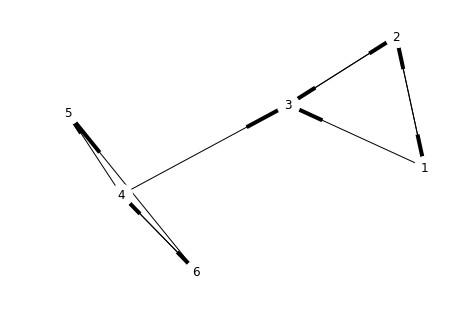

In [107]:
# 有向グラフの描画
G = nx.DiGraph()
G.add_nodes_from([1,2,3,4,5,6])
G.add_edges_from([(1,2),(1,3),(2,1),(2,3),(3,2),(4,3),(4,5),(4,6),(6,4),(6,5)])
pos = nx.spring_layout(G) # ばねモデルに基づくグラフのレイアウト
nx.draw(G, pos, with_labels=True, node_size=500, node_color="w")
plt.show()

In [116]:
A = np.array([
    [0, 1/2, 1/2, 0, 0, 0],
    [1/2, 0, 1/2, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 0, 1/3, 0, 0, 0],
    [1/6, 1/6, 1/6, 1/6, 1/6, 1/6],
    [0, 0, 0, 1/2, 1/2, 0]
])
A

array([[ 0.  ,  0.5 ,  0.5 ,  0.  ,  0.  ,  0.  ],
       [ 0.5 ,  0.  ,  0.5 ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.33,  0.  ,  0.  ,  0.  ],
       [ 0.17,  0.17,  0.17,  0.17,  0.17,  0.17],
       [ 0.  ,  0.  ,  0.  ,  0.5 ,  0.5 ,  0.  ]])

In [117]:
p = pagerank(A, d = 0.85, eps=1e-6)
pp = personalized_pagerank(A, d = 0.85, eps=1e-6)
print(p)
print(pp)

P:  [ 0.17  0.17  0.17  0.17  0.17  0.17]
P:  [ 0.17  0.17  0.17  0.17  0.17  0.17]
[ 0.16  0.31  0.24  0.04  0.04  0.03]
[ 0.16  0.31  0.24  0.04  0.04  0.03]


In [120]:
a = np.asarray([1/2, 1/2, 0, 0, 0, 0])
p = pagerank(A, d = 0.85, eps=1e-6, p=a/np.sum(a))
pp = personalized_pagerank(A, d = 0.85, eps=1e-6, p=a/np.sum(a))
print(p)
print(pp)

P:  [ 0.5  0.5  0.   0.   0.   0. ]
P:  [ 0.5  0.5  0.   0.   0.   0. ]
[ 0.16  0.31  0.24  0.04  0.04  0.03]
[ 0.26  0.44  0.3   0.    0.    0.  ]


In [121]:
a = np.asarray([1, 0, 0, 0, 0, 0])
p = pagerank(A, d = 0.85, eps=1e-6, p=a/np.sum(a))
pp = personalized_pagerank(A, d = 0.85, eps=1e-6, p=a/np.sum(a))
print(p)
print(pp)

P:  [ 1.  0.  0.  0.  0.  0.]
P:  [ 1.  0.  0.  0.  0.  0.]
[ 0.16  0.31  0.24  0.04  0.04  0.03]
[ 0.31  0.39  0.3   0.    0.    0.  ]


上記のように，初期状態分布が一様の場合，personalized_pagerankを適用しても，
通常のPageRankと変わらないが，偏りのある初期分布の場合に，異なる結果が得られた．
<br>例えば，[1, 0, 0, 0, 0, 0]であれば，ノード1に対する他のノードの重要度が計算できる．
この場合，リンクで直接接続されたノード2，ノード3がノード1にとって重要なノードであると言える．

## 任意課題（２） 実データに対するPageRank計算

ノード数が1万件を超えるような実グラフデータを各自で用意し，PageRankを求め結果を簡潔に報告せよ．
 - グラフの可視化を行うかどうかは自由
 - 極めて大規模なグラフに対してPageRankを求める場合は，NetworkXのpagerank_scipy関数等の使用を検討するとよい
 
## 任意課題（３） その他リンク解析アルゴリズムの実装

HITS，TextRank， あるいはVisualRankアルゴリズムを実装せよ．適宜データを用意し，実装したアルゴリズムをそのデータに適用し結果を報告せよ．